<a href="https://colab.research.google.com/github/RodrigoZonzin/pousoAlegre_LULC/blob/main/python/selper_pousoAlegreImgs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rasterio -q

In [ ]:
import rasterio as rio
from rasterio.plot import show
import numpy as np
from rasterio.mask import mask
from matplotlib.colors import ListedColormap
#from matplotlib_scalebar.scalebar import ScaleBar
from rasterio.plot import plotting_extent

import os

import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

In [ ]:
values_list = [0, 1, 2, 3, 4, 5]
colors_list = ['white','#006400', '#aa0000', '#FFFFB2', '#0000FF', '#e993fa']
cmap = ListedColormap(colors_list, name='custom_cmap', N=len(colors_list))

In [ ]:
img1993 = rio.open('/content/drive/MyDrive/selper_pousoAlegre/LULC_pousoAlegre_1993PORFAVOR.tif').read()
img2004 = rio.open('/content/drive/MyDrive/selper_pousoAlegre/LULC_pousoAlegre_2004PORFAVOR.tif').read()
img2014 = rio.open('/content/drive/MyDrive/selper_pousoAlegre/LULC_pousoAlegre_2014NovoBom.tif').read()
img2024 = rio.open('/content/drive/MyDrive/selper_pousoAlegre/LULC_pousoAlegre_2024.tif').read()

In [ ]:
def plotSideBySide(num_x, num_y, imagens, title):
    fig, axs = plt.subplots(num_x, num_y, figsize = (10,10))

    for i, ax in enumerate(axs.flat):
                ax.imshow(np.squeeze(imagens[i]), cmap = cmap)
                ax.set_title(title[i])
                ax.axis('off')

    plt.tight_layout()
    plt.show()

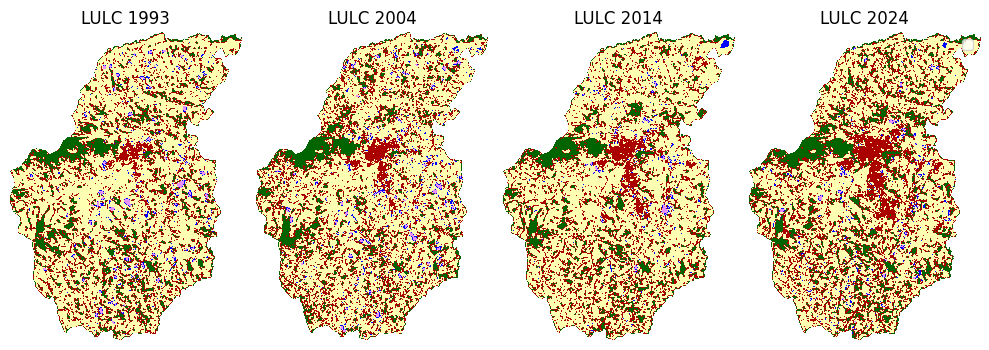

In [ ]:
plotSideBySide(1, 4, [img1993, img2004, img2014, img2024], ['LULC 1993', 'LULC 2004', 'LULC 2014', 'LULC 2024'])

In [ ]:
def calcArea(img):
  img = img[0]
  forest_area = 0
  urban_area = 0
  pasture_area = 0
  water_area = 0
  soil_area = 0

  #30m x 30m = 0,003 km * 0,003 km
  pixel_area = (30/1000)**2

  for linha in img:
    for elemento in linha:
      if elemento == 1:
        forest_area += pixel_area

      elif elemento == 2:
        urban_area += pixel_area

      elif elemento == 3:
        pasture_area += pixel_area

      elif elemento == 4:
        water_area += pixel_area

      elif elemento == 5:
        soil_area += pixel_area

  return ({'forest': forest_area, 'urban': urban_area, 'pasture': pasture_area, 'water': water_area, 'soil': soil_area})


In [ ]:
dados = pd.DataFrame(columns = ['img1993', 'img2004'])

In [ ]:
dados['img1993'] = calcArea(img1993)
dados['img2004'] = calcArea(img2004)
dados['img2014'] = calcArea(img2014)
dados['img2024'] = calcArea(img2024)

In [ ]:
#dados['dif'] = dados['img2014'] - dados['img2004']
#dados['dif_pp'] = (( dados['img2014']/dados['img2004'] ) -1)*100

In [ ]:
dados

,img1993,img2004,img2014,img2024
forest,118.1736,120.1176,113.0382,135.5049
urban,15.0129,29.6514,32.1192,39.0069
pasture,394.9920,370.8558,385.4871,352.8855
water,5.4585,12.8367,8.2584,10.9413
soil,11.2563,11.4246,5.9913,6.5556


In [ ]:
dadosDiferenca = pd.DataFrame()
dadosDiferenca['2024vs1993'] = dados['img2024'] - dados['img1993']
dadosDiferenca['2024vs1993pp'] = ((dados['img2024']/dados['img1993'])-1)*100

In [ ]:
dadosDiferenca

,2024vs1993,2024vs1993pp
forest,17.3313,14.665966
urban,23.9940,159.822553
pasture,-42.1065,-10.660089
water,5.4828,100.445177
soil,-4.7007,-41.760614


In [ ]:
dadosDiferenca['2004vs1993'] = dados['img2004'] - dados['img1993']
dadosDiferenca['2004vs1993pp'] = ((dados['img2004']/dados['img1993'])-1)*100

In [ ]:
dadosDiferenca

,2024vs1993,2024vs1993pp,2004vs1993,2004vs1993pp
forest,17.3313,14.665966,1.9440,1.645037
urban,23.9940,159.822553,14.6385,97.506145
pasture,-42.1065,-10.660089,-24.1362,-6.110554
water,5.4828,100.445177,7.3782,135.169002
soil,-4.7007,-41.760614,0.1683,1.495163


In [ ]:
dadosDiferenca['2014vs2004'] = dados['img2014'] - dados['img2004']
dadosDiferenca['2014vs2004pp'] = ((dados['img2014']/dados['img2004'])-1)*100

In [ ]:
dadosDiferenca['2024vs2014'] = dados['img2024'] - dados['img2014']
dadosDiferenca['2024vs2014pp'] = ((dados['img2024']/dados['img2014'])-1)*100

In [ ]:
dadosDiferenca

,2024vs1993,2024vs1993pp,2004vs1993,2004vs1993pp,2014vs2004,2014vs2004pp,2024vs2014,2024vs2014pp
forest,17.3313,14.665966,1.9440,1.645037,-7.0794,-5.893724,22.4667,19.875316
urban,23.9940,159.822553,14.6385,97.506145,2.4678,8.322710,6.8877,21.444183
pasture,-42.1065,-10.660089,-24.1362,-6.110554,14.6313,3.945280,-32.6016,-8.457248
water,5.4828,100.445177,7.3782,135.169002,-4.5783,-35.665708,2.6829,32.486922
soil,-4.7007,-41.760614,0.1683,1.495163,-5.4333,-47.557901,0.5643,9.418657
